**ABSTRACT**:

Speaking of Machine Learning, there are basically three types of machine learning, Reinforcement Learning, Supervised and Unsupervised. Supervised learning is based on a set of techniques for adjusting function parameters so that these functions satisfy some conditions that are given by the values of the tags. When we have these parameters adjusted and we already know which function we are trying to calculate, we say that we have a model.

For this, the machine learning algorithms adjust the model (from English, model fit), which occurs while it is being trained based on the data so that it becomes possible to make predictions with the model (from English, model predict) as trained using the tags. With that, overfitting and underfitting can be defined.

This understanding will guide you to take corrective action. It is possible to determine whether a predictive model is underfitting or overfitting training data by consulting the forecasting error in the training data and the evaluation data. Understanding model fit is important to understand the root cause of poor model accuracy.

The overfitting model occurs when the model has adapted very well to the data with which it is being trained; however, it does not generalize well to new data. In other words, the model “decorated” the set of training data, but did not really learn what differentiates that data for when it needs to face new tests.

The underfitting model occurs when the model does not adapt well to the data with which it has been trained.

- **Data pre-processing and application**:
These data will be properly prepared, going through some cleaning and adjustment processes, which are the pre-processing and selection of variables, so that they will be able to be presented to a machine learning algorithm, which will make the predictions, checking how far the result is of the correct value, readjusting the parameters used in the forecast in order to obtain a more adequate value. This process will be repeated until the error between the actual values and the predicted values stops decreasing with each new adjustment.

- **Separation of historical data**:
We could use all the historical data in the above process, thus creating a machine learning model ready to receive new data and make its predictions, however this way we would not know the real performance of this model. The algorithm could learn perfectly the relation existing in the presented data and with that create a model that suffers from Overfitting and we would only discover this problem after the disastrous predictions generated by this model.
Thus, in order to measure the real performance of the created model, it is necessary that we carry out tests with it, using different data than the ones presented in its creation.
For this purpose, after performing the pre-processing, we will separate all historical data into two groups, the first being responsible for learning the model and the second for carrying out the tests.

- **Training Data**:
As we can imagine, training data is the data that will be presented to the machine learning algorithm for creating the model. These data usually represent about 70% of the total data.

- **Test Data**:
They will be presented to the model after its creation, simulating real predictions that the model will make, thus allowing the real performance to be verified. These data usually represent about 30% of the total data.

Randomness in data separation
It is important to note that the separation of data in training and testing is an essential step, and that if it is done in the wrong way, it can result in problems in the model.

Imagine you have data on twenty thousand cars, with some characteristics and their value. You decide that you will use fifteen thousand samples to train your model, and for that you select the first fifteen thousand lines, leaving the last five thousand for testing. However, these lines were organized in alphabetical order based on the names of the cars. Do you see the problem? Some specific car models will be present only in the training data, and others only in the test data.
This situation will lead to a deficient model, which has not learned from all types of data that it could, and which will also not be tested correctly. After all, in the test data there will be only car models that start, say, with the letters S, T, U, V, X, Y, Z (end of the alphabet).
The solution to this problem lies in randomness. Selecting the data randomly, there will be no pattern when dividing the data, and each observation will have the same probability of being selected.

# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
titanic_train = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Labs/7 - Machine Learning/titanic_train.csv')
titanic_test = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Labs/7 - Machine Learning/titanic_test.csv')

In [23]:
titanic_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,33.0,1,2,27.7500,0,0,1,1
1,2,42.0,1,0,26.0000,0,0,1,1
2,2,25.0,0,0,13.0000,1,0,1,0
3,1,40.0,0,0,27.7208,1,0,0,0
4,1,19.0,1,0,91.0792,0,0,0,1
5,2,42.0,0,0,13.0000,0,0,1,1
6,2,30.0,1,0,24.0000,1,0,0,0
7,1,25.0,1,0,55.4417,1,0,0,1
8,1,39.0,1,1,83.1583,0,0,0,1
9,1,24.0,0,0,79.2000,1,0,0,0


In [24]:
titanic_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,24.0,0,0,69.3000,0,0,0,1
1,1,54.0,1,0,78.2667,0,0,0,1
2,1,52.0,1,1,79.6500,1,0,1,0
3,1,18.0,2,2,262.3750,0,0,0,1
4,2,27.0,0,0,26.0000,1,0,1,0
5,1,17.0,0,2,110.8833,1,0,0,1
6,3,35.0,1,1,20.2500,0,0,1,1
7,1,58.0,0,1,153.4625,0,0,1,1
8,1,47.0,0,0,52.0000,1,0,1,0
9,3,22.0,0,0,7.7750,0,0,1,1


# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [25]:
X_train = titanic_train[['Sex_male','Age']]
X_test = titanic_test[['Sex_male','Age']]

In [26]:
y_train = titanic_train['Survived']
y_test = titanic_test['Survived']

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use the LogisticRegression classifier to train your model on your train set.

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [30]:
y_pred = model.predict(X_test)

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [31]:
model.score(X_test, y_test)

0.7482517482517482

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

**Answer: .score() calculates the accuracy of a model, it is not appropriate since our dataset is unbalanced.**

Accuracy: $\frac{\text{Number observations I've correctly predicted}}{\text{Total number of observations}}$

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

In [32]:
from sklearn.metrics import plot_confusion_matrix

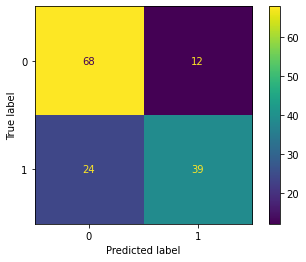

In [33]:
plot_confusion_matrix(model, X_test, y_test)

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [34]:
from sklearn.metrics import recall_score,precision_score

In [36]:
r = precision_score(y_test, model.predict(X_test))
r

0.7647058823529411

In [37]:
p = recall_score(y_test, model.predict(X_test))
p

0.6190476190476191

### Questions:

- What do these precision and recall scores mean? Explain precision and recall with your own words.
- Are these the precision and recall scores for which threshold? Explain what a threshold mean with your own words.

**Answer:**

A confusion matrix is a table that indicates the errors and successes of your model, comparing it with the expected result.
- **True Positives**: correct classification of the Positive class;
- **False Negatives (Type II Error)**: error in which the model predicted the Negative class when the real value was Positive class;
- **False Positives (Type I Error)**: error in which the model predicted the Positive class when the real value was Negative;
- **True Negatives**: correct classification of the Negative class.

**Evaluation Metrics:**
- **Accuracy**: indicates an overall performance of the model. Among all classifications, how many the model classified correctly;
- **Precision**: among all the Positive class ratings that the model made, how many are correct. It can be used in a situation where False Positives are considered to be more harmful than False Negatives. For example, when classifying a stock as a good investment, it is necessary that the model is correct, even if it ends up classifying good investments as bad investments (False Negative situation) in the process. In other words, the model must be precise in its classifications, since from the moment that we consider it a good investment when in fact it is not, a great loss of money can happen.
**In the confusion matrix above, 51 dead people were predicted, 39 were predicted correctly (True Positive) and 12 were predicted incorrectly (False Positive).**
- **Recall**: among all situations of class Positive as expected value, how many are correct. The recall can be used in a situation where False Negatives are considered more harmful than False Positives. For example, the model must anyway find all sick patients, even if it classifies healthy ones as sick (False Positive situation) in the process.
**In the confusion matrix above, we have 63 deaths, 39 cases were correctly predicted, but 24 were not predicted (False Negative).**
- **F1-Score**: it is a way to observe only 1 metric instead of two (precision and recall) in any situation. It is a harmonic mean between the two, which is much closer to the lower values than a simple arithmetic mean. That is, when you have a low F1-Score, it is an indication that either the accuracy or the recall is low.
- **Threshold**: when data is collected for that Statistic, it is compared with the associated Threshold value. If the collected data value does not suit the Threshold value then it indicates that this kind of data might lead to poor performance of the device or network. The default threshold is 0.5, it means that if the model has a probability> 0.5 the result will be 1.

## Compare a measure of accuracy, recall and precision for both train and test sets. 

You've calculated the metrics for the test dataset. Now, calculate the metrics for the train dataset and compare the results. What do you observe? Based on what you see, do you think your model has overfitted? 

**Test**:

In [41]:
model.score(X_test, y_test)

0.7482517482517482

In [42]:
r = precision_score(y_test, model.predict(X_test))
r

0.7647058823529411

In [43]:
p = recall_score(y_test, model.predict(X_test))
p

0.6190476190476191

**Train**:

In [44]:
model.score(X_train, y_train)

0.7873462214411248

In [45]:
r = precision_score(y_train, model.predict(X_train))
r

0.75

In [46]:
p = recall_score(y_train, model.predict(X_train))
p

0.6933333333333334

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
treemodel = DecisionTreeClassifier()

treemodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
treemodel.fit(X_train,y_train)

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

**TEST**:

In [50]:
treemodel.score(X_test, y_test)

0.6573426573426573

In [51]:
precision_score(y_test, treemodel.predict(X_test))

0.6521739130434783

In [52]:
recall_score(y_test, treemodel.predict(X_test))

0.47619047619047616

**TRAIN**:

In [53]:
treemodel.score(X_train, y_train)

0.8400702987697716

In [54]:
precision_score(y_train, treemodel.predict(X_train))

0.8681318681318682

In [55]:
recall_score(y_train, treemodel.predict(X_train))

0.7022222222222222

## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

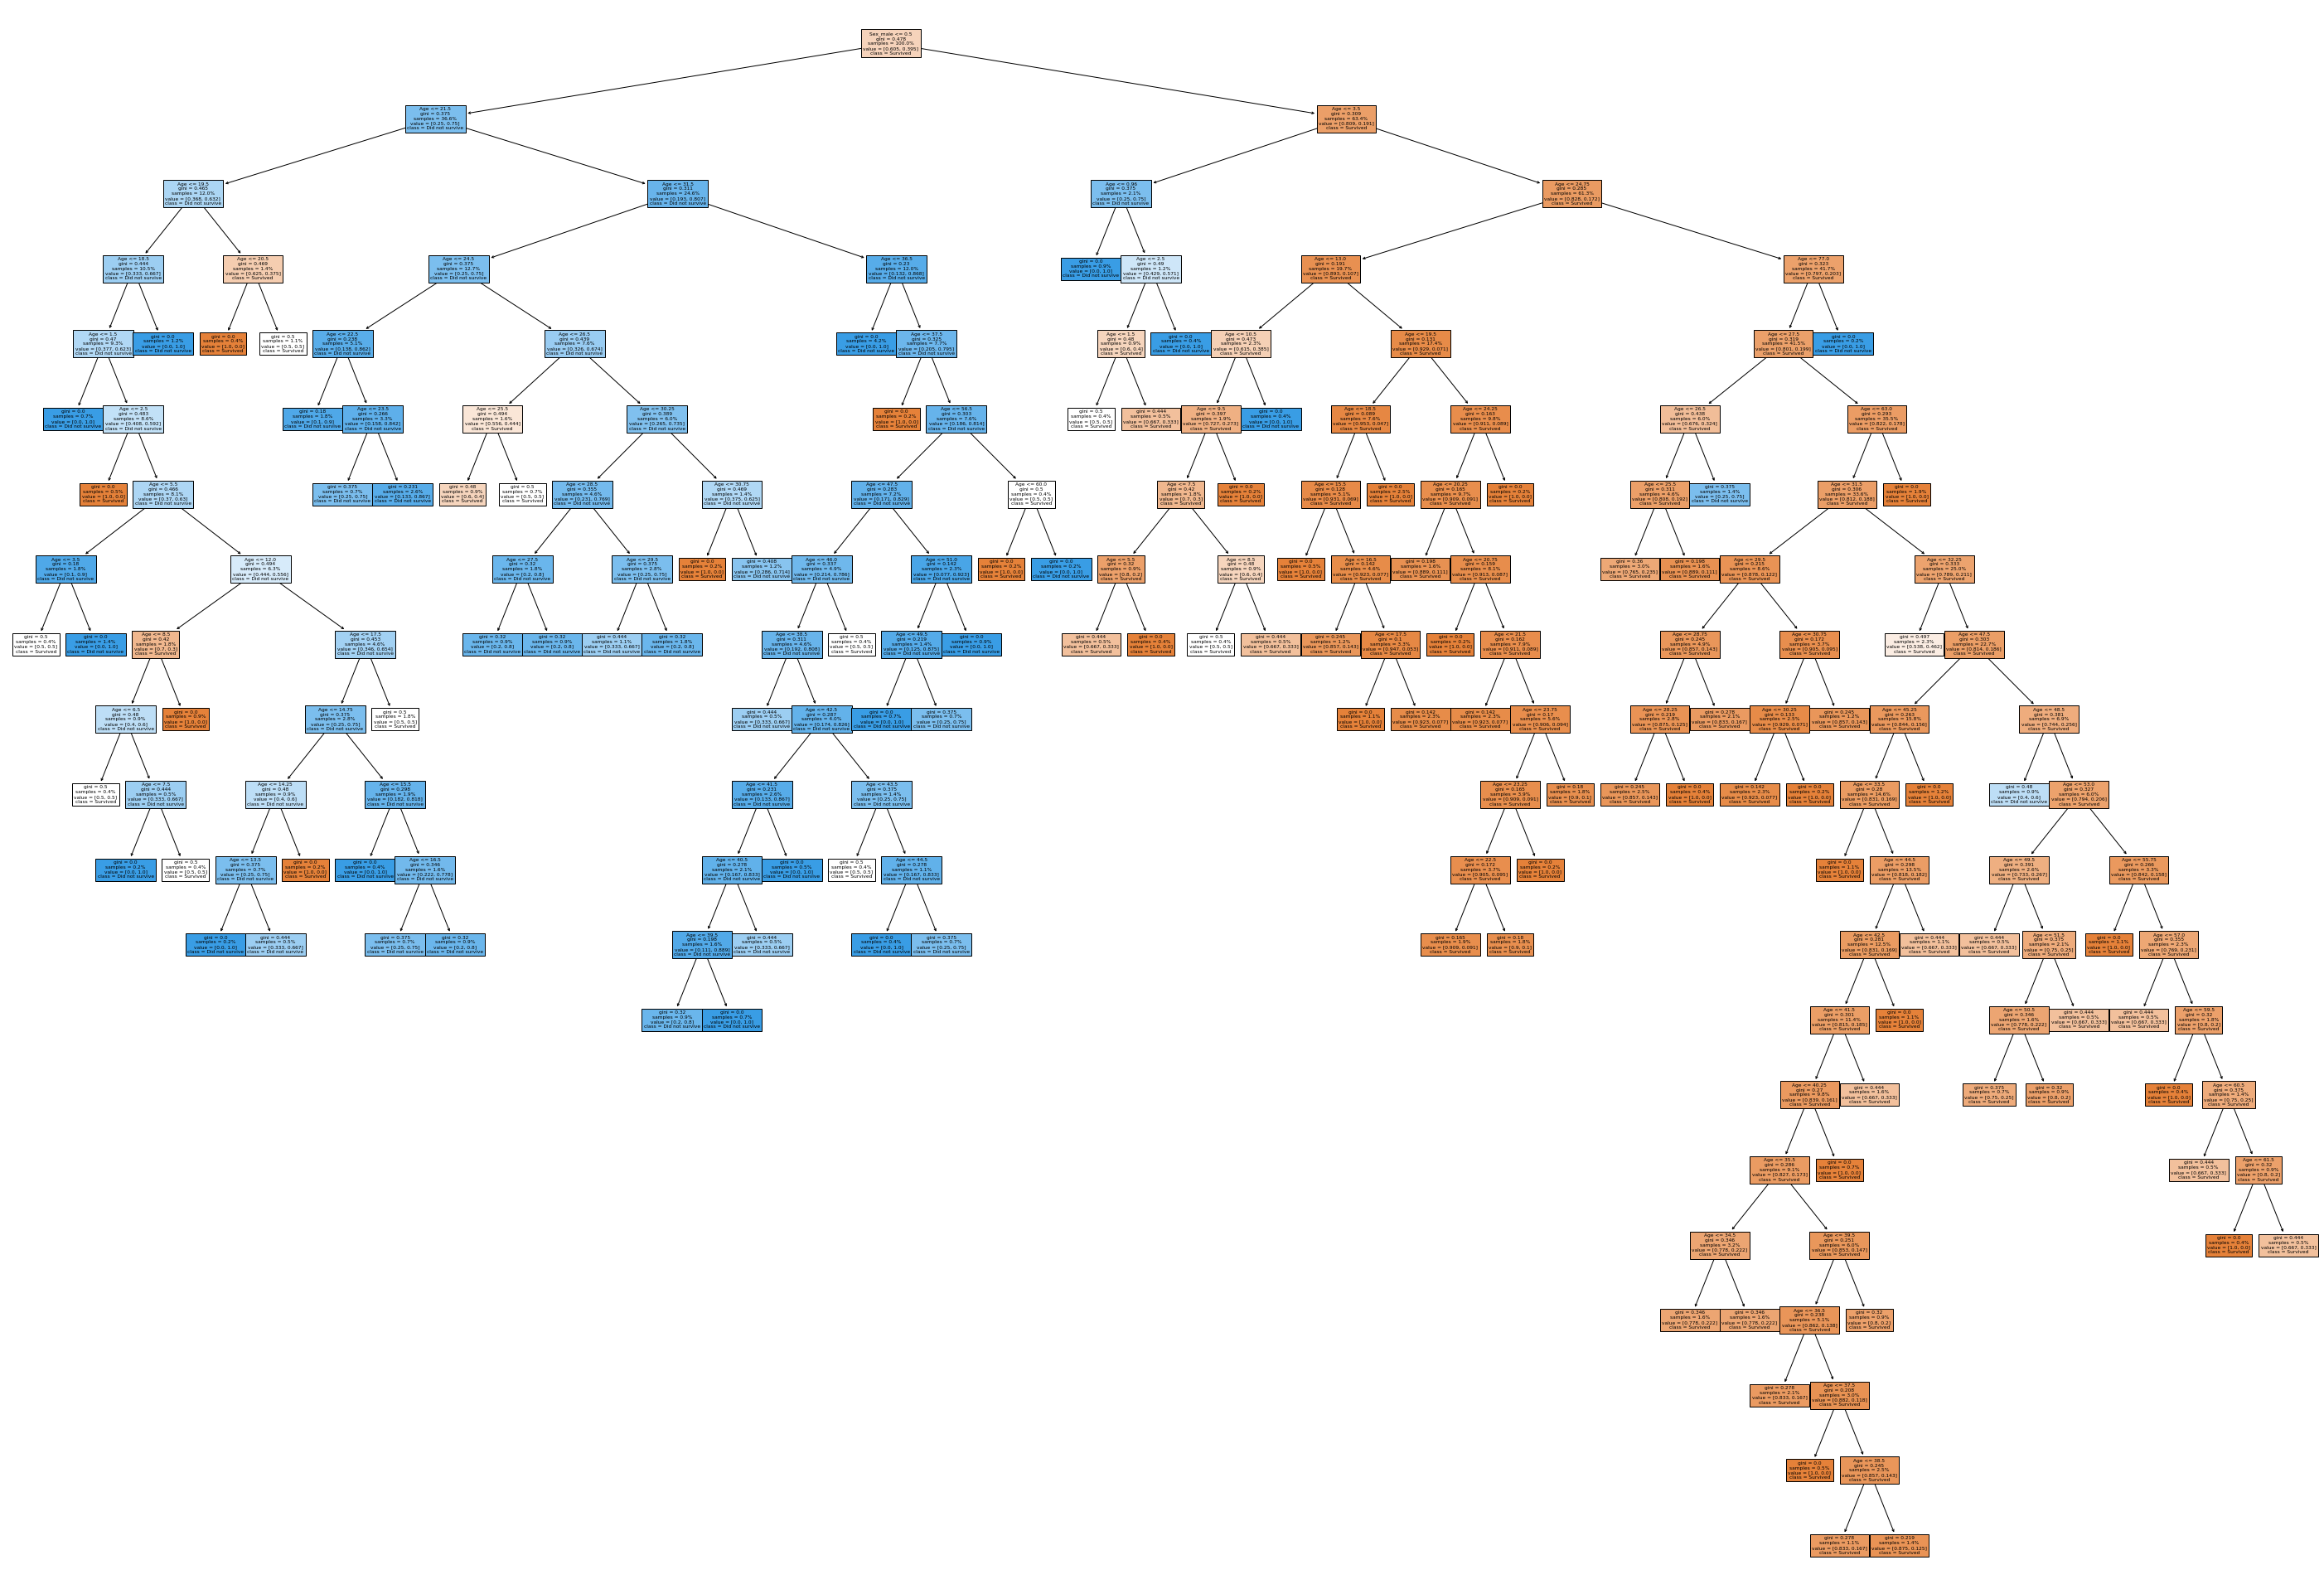

In [57]:
plt.figure(figsize=(50,35))
plot_tree(treemodel, feature_names=X_train.columns, class_names=["Survived","Did not survive"], proportion=True, filled=True)
plt.show()

What do you think happened? Did you expect the resulting tree to have that size?

**Answer: When the tree tend to overfit, it made breaks for almost all the data.**

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

In [58]:
pip install mlxtend 

     |████████████████████████████████| 1.3 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [62]:
import mlxtend.plotting as mlplt

/Users/alessandra/Library/Python/3.7/lib/python/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'Age')

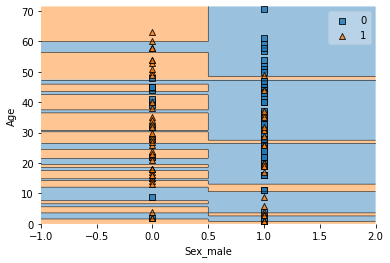

In [63]:
X_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_numpy, y_test_numpy, treemodel)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

You should have observed a high granularity of lines cutting the drawing. What do you think those represent? What exactly do they represent from a Tree algorithm? 

**Answer: There are lines that only have a couple of samples, so there is a lot of overfitting.**

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

In [64]:
import mlxtend.plotting as mlplt

/Users/alessandra/Library/Python/3.7/lib/python/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'Age')

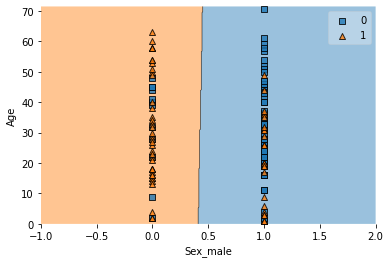

In [65]:
X_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_numpy, y_test_numpy, model)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

What differences do you observe from them? The variable Age is important for the logistic regression? For different values of Age, how is the decision boundary affected? Why do you think that happens? Try to remember the `titanic-exploration` lab to recall how was Age correlated with the variable `Survived` and how we've managed to see some importance there.

**Answer: The logistic regression did not notice the differences, so maybe the variable Age is not very significant for the logistic regression.**

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

In [66]:
treemodel_fix = DecisionTreeClassifier(max_depth=4)
treemodel_fix.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**TEST**:

In [67]:
treemodel_fix.score(X_test, y_test)

0.7552447552447552

In [68]:
precision_score(y_test, treemodel_fix.predict(X_test))

0.7692307692307693

In [69]:
recall_score(y_test, treemodel_fix.predict(X_test))

0.6349206349206349

**TRAIN**:

In [70]:
treemodel_fix.score(X_train, y_train)

0.804920913884007

In [71]:
precision_score(y_train, treemodel_fix.predict(X_train))

0.7740384615384616

In [72]:
recall_score(y_train, treemodel_fix.predict(X_train))


0.7155555555555555

## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

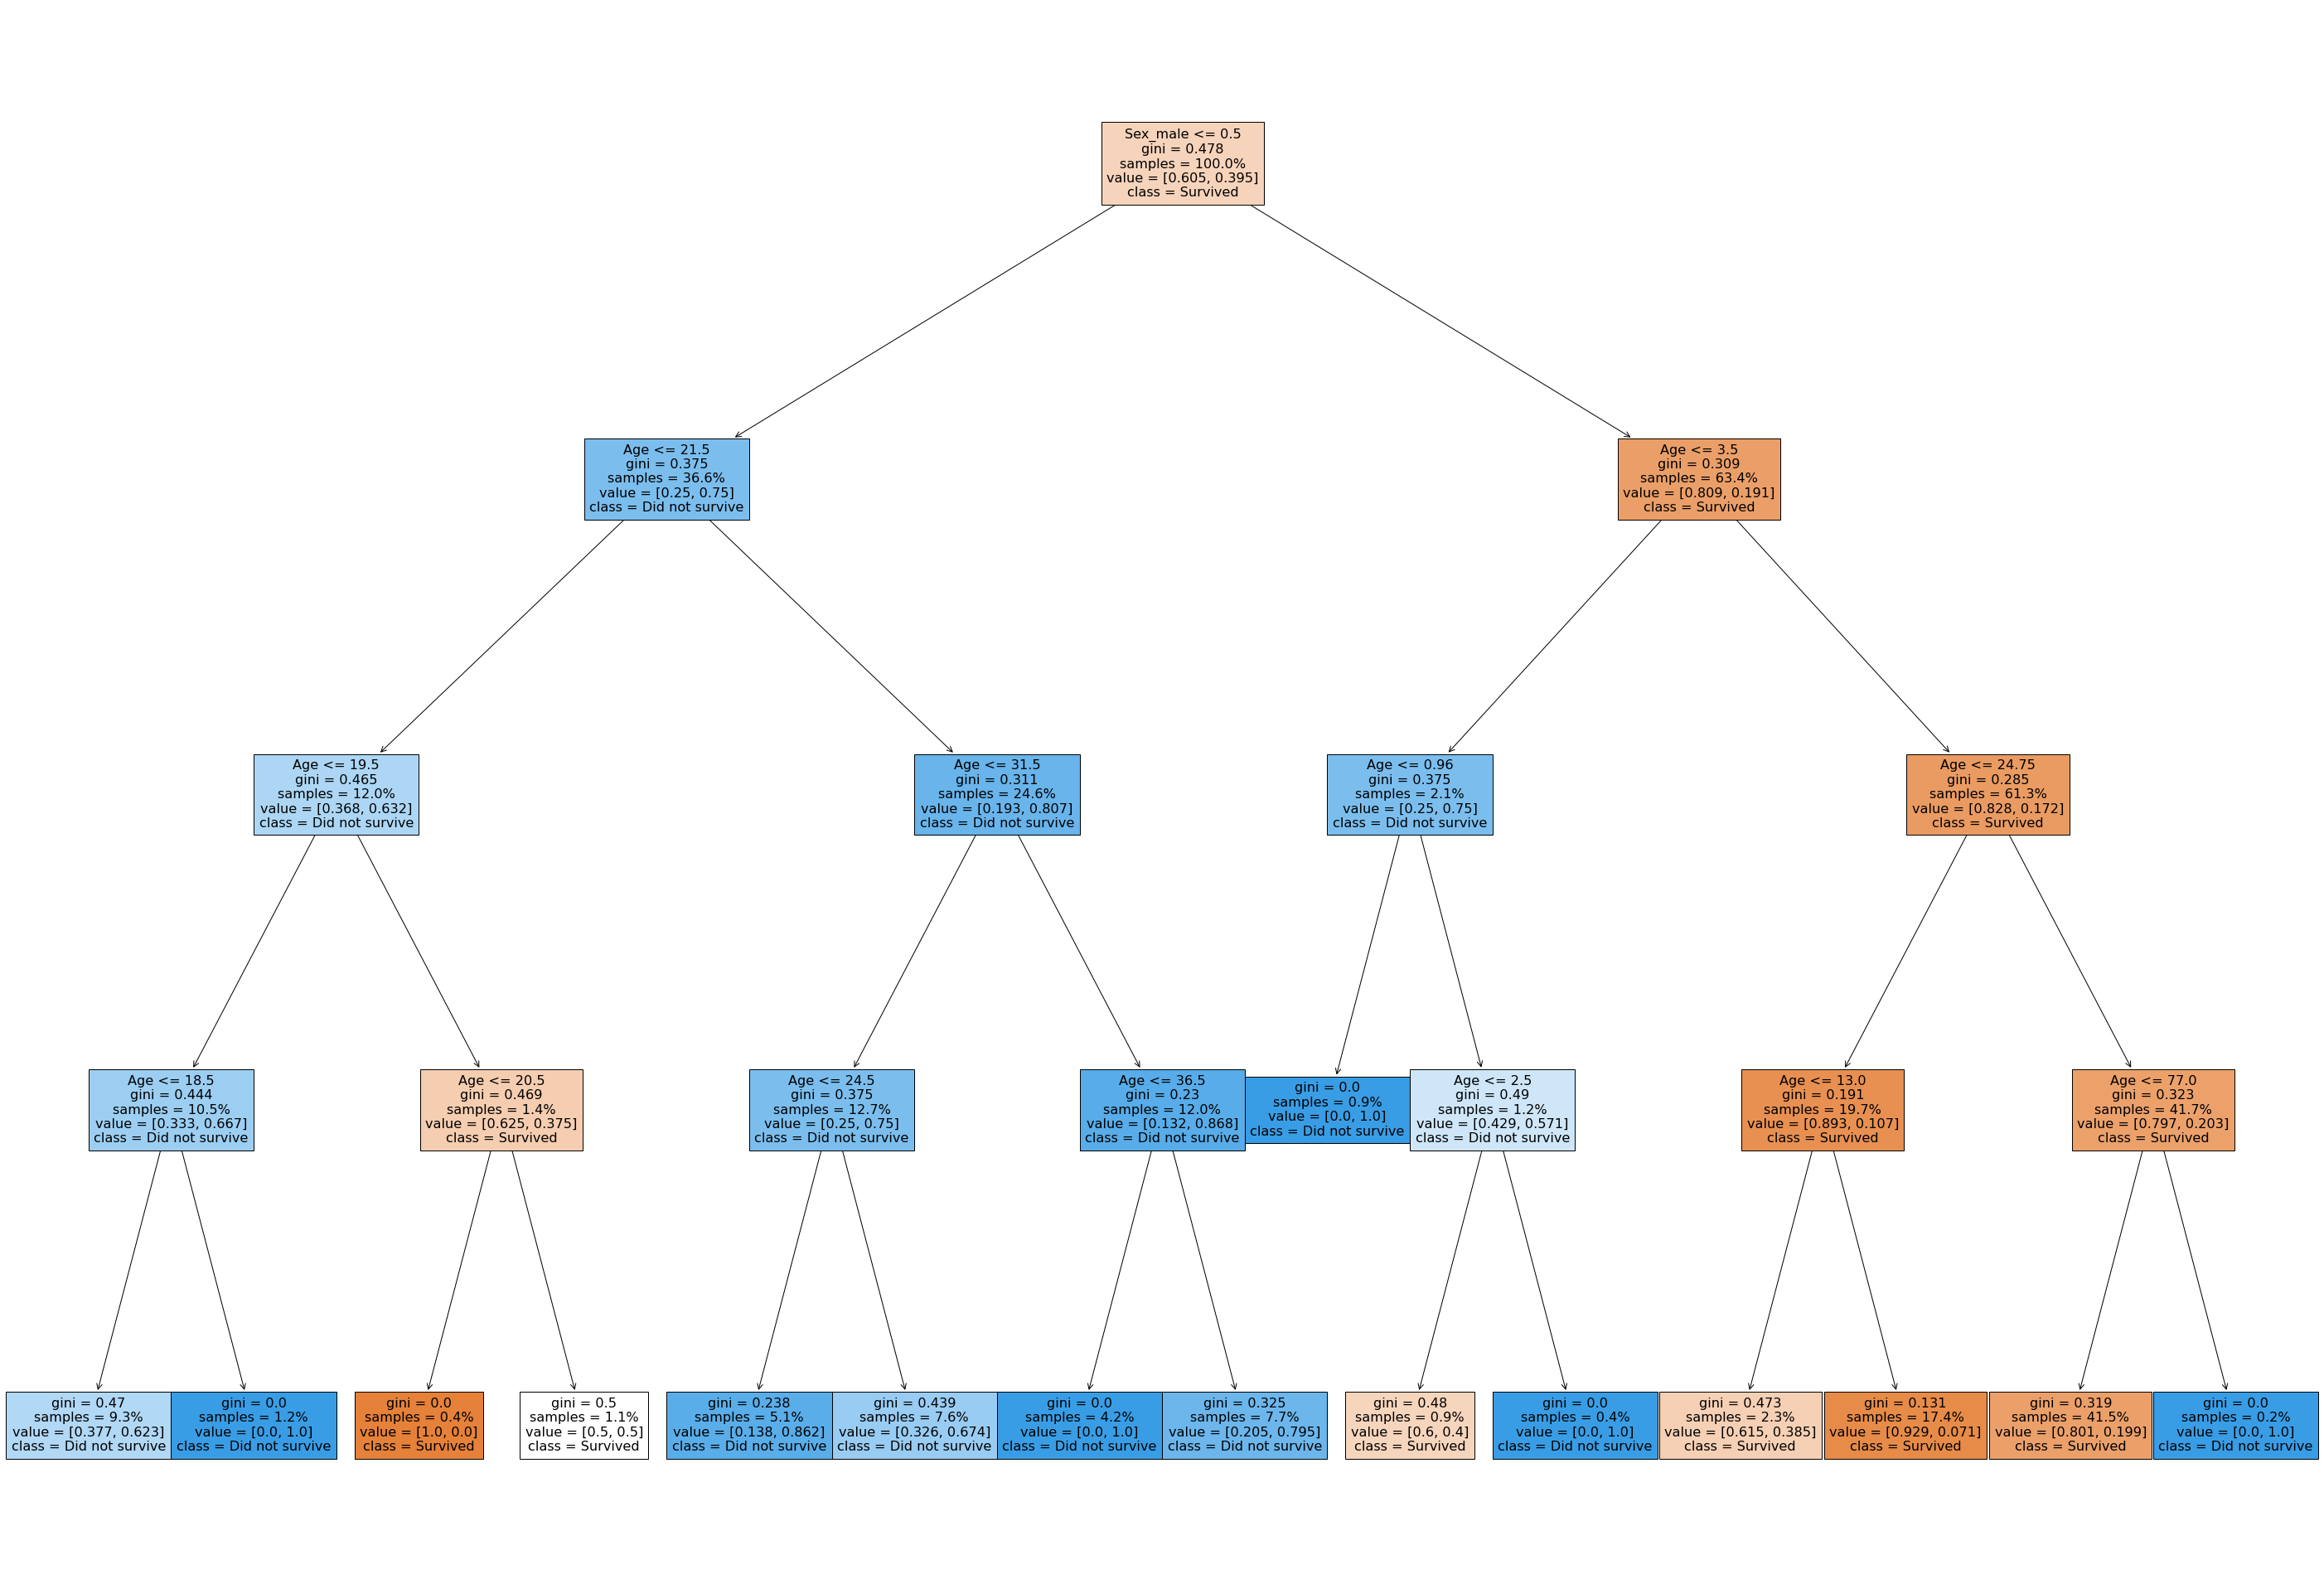

In [73]:
plt.figure(figsize=(50,35))
plot_tree(treemodel_fix, feature_names=X_train.columns, class_names=["Survived","Did not survive"], proportion=True, filled=True)
plt.show()

/Users/alessandra/Library/Python/3.7/lib/python/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'Age')

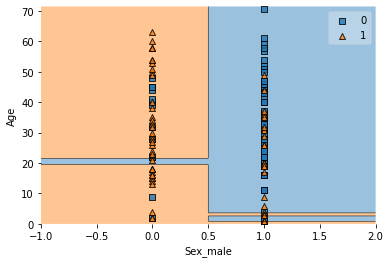

In [74]:
X_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_numpy, y_test_numpy, treemodel_fix)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

### Question:

- Can you identify which one was the most important feature on this decision tree model?

**Answer: It seems to be the Age.**

# Finally, use more variables

Try to obtain a good score for your problem. Use more variables if you wish. You can plot the tree to understand the variables.

In [77]:
X_train = titanic_train.drop("Survived",axis=1)
X_test = titanic_test.drop("Survived",axis=1)

In [78]:
treemodel_new = DecisionTreeClassifier(max_depth=4)
treemodel_new.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**TEST**:

In [79]:
treemodel_new.score(X_test, y_test)

0.7062937062937062

In [81]:
precision_score(y_test, treemodel_new.predict(X_test))

0.723404255319149

In [83]:
recall_score(y_test, treemodel_new.predict(X_test))

0.5396825396825397

**TRAIN**:

In [80]:
treemodel_new.score(X_train, y_train)

0.8347978910369068

In [82]:
precision_score(y_train, treemodel_new.predict(X_train))

0.8324873096446701

In [84]:
recall_score(y_train, treemodel_new.predict(X_train))

0.7288888888888889

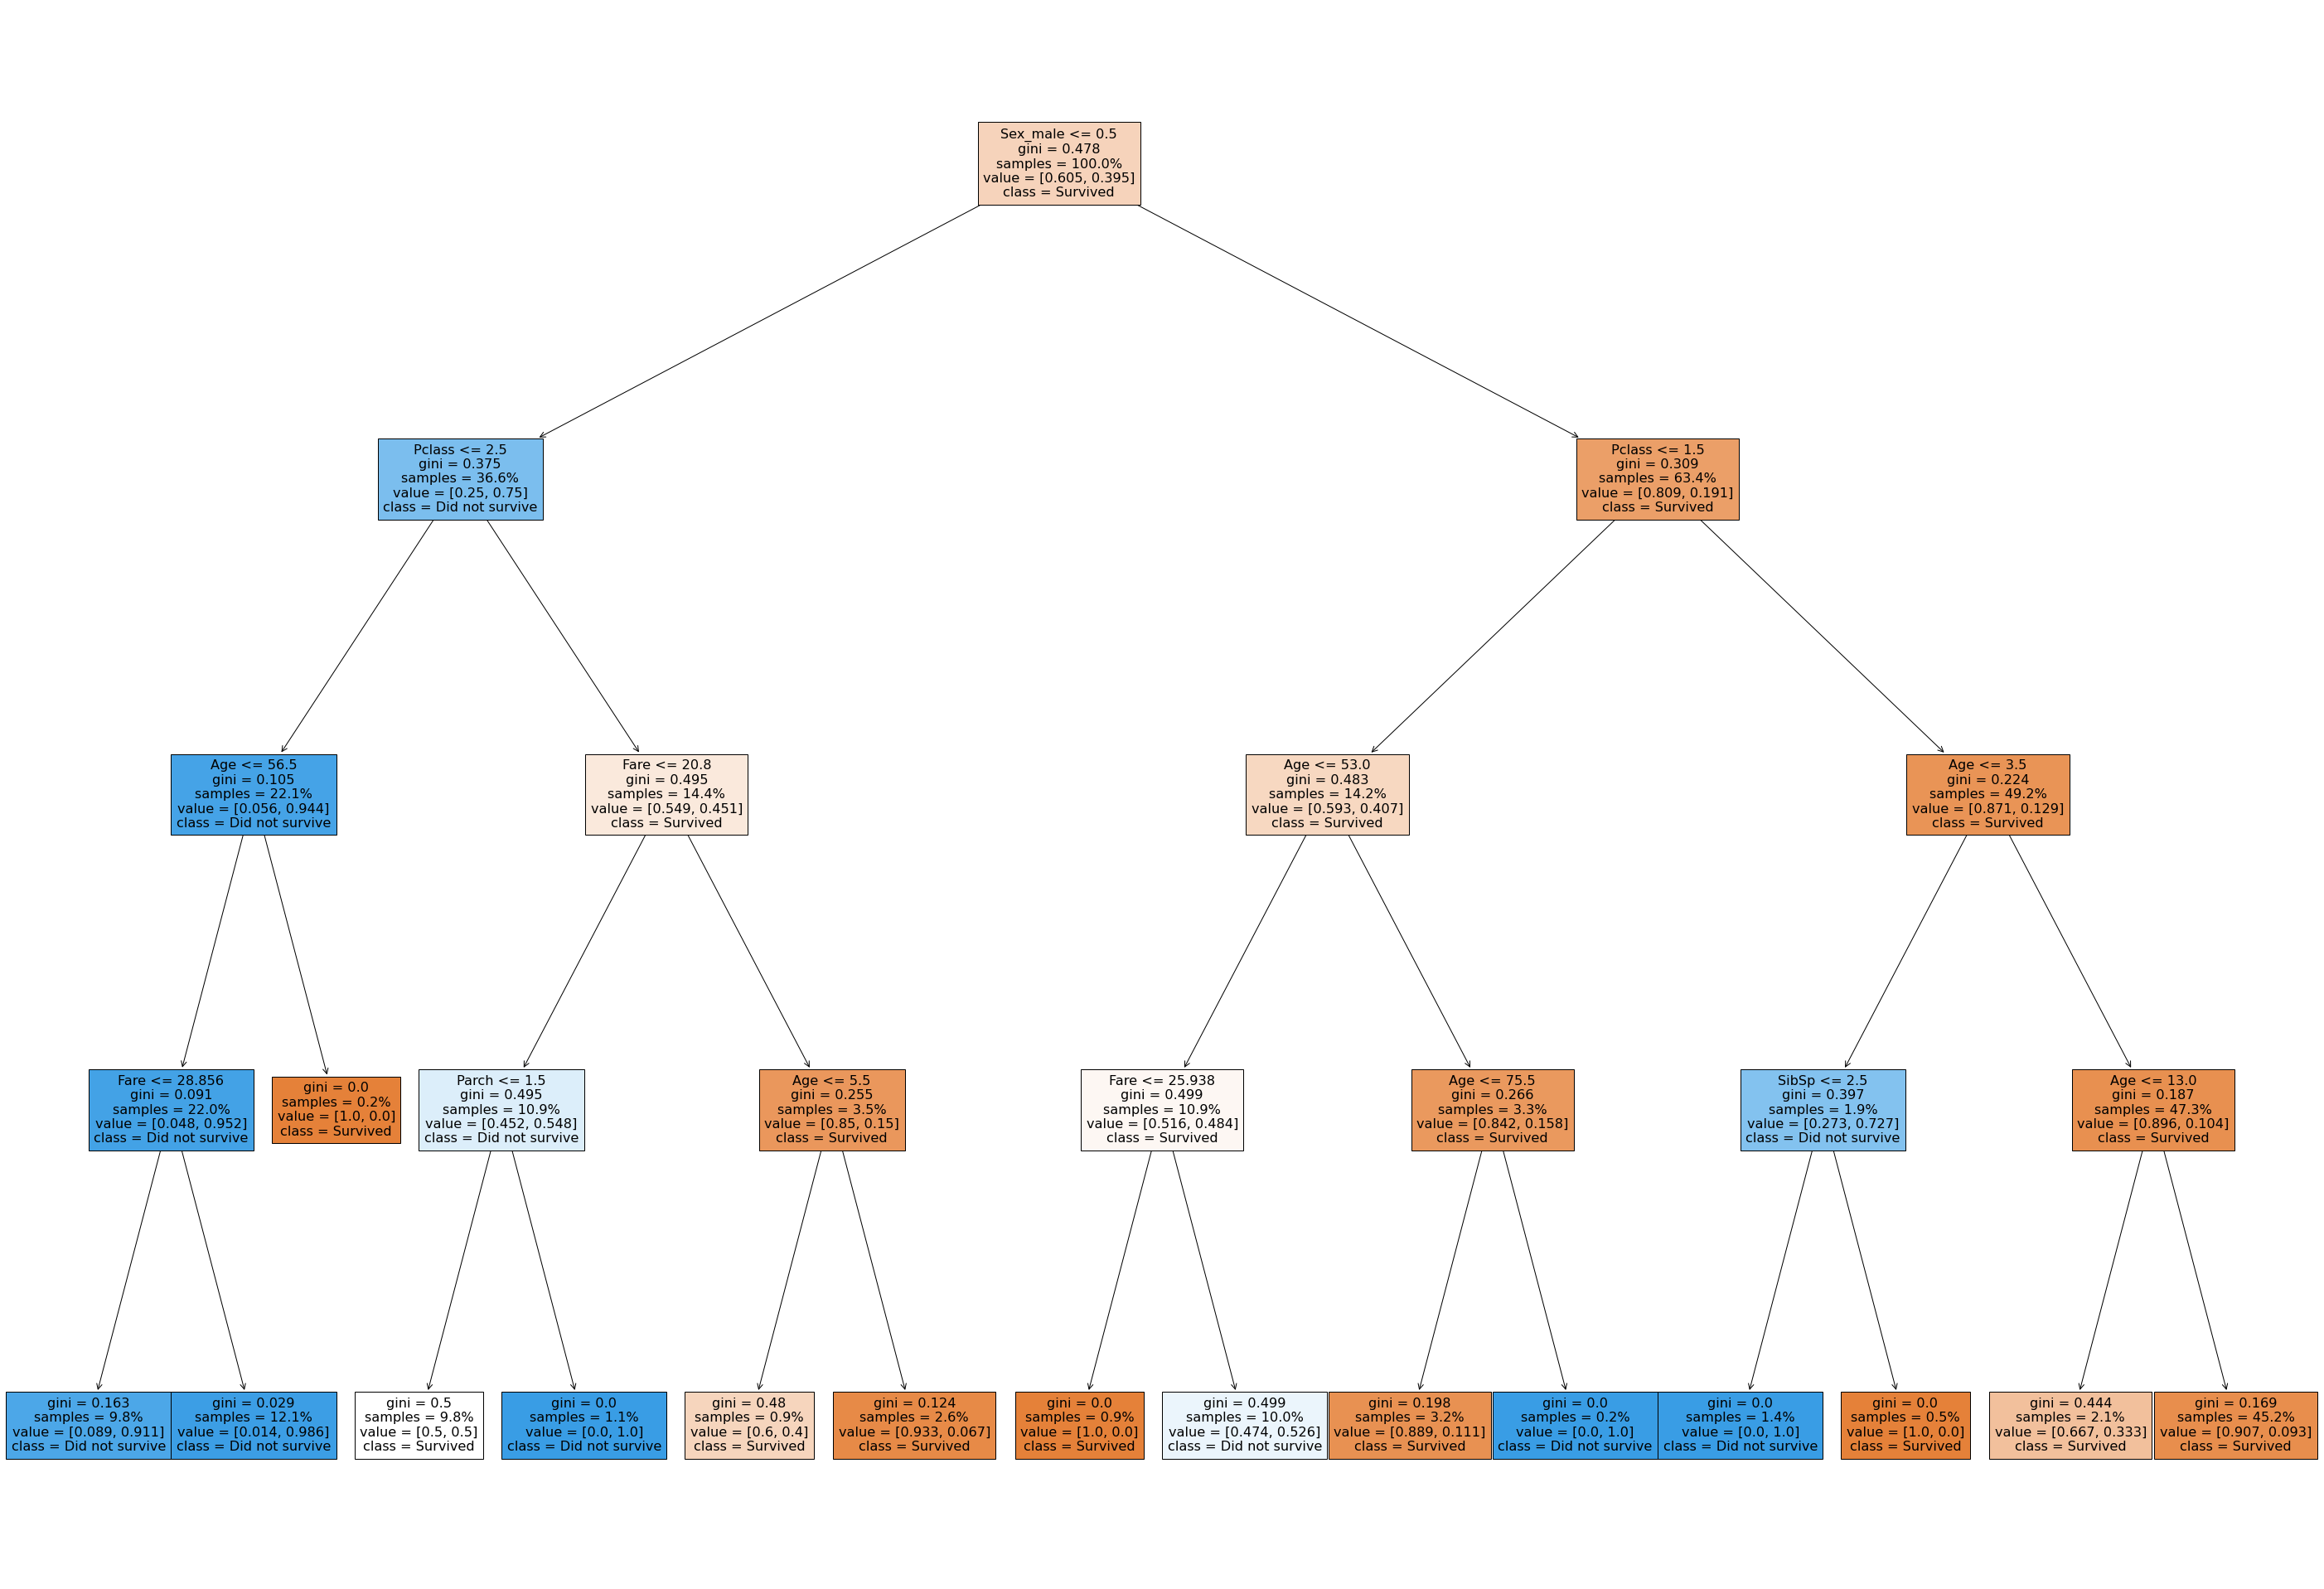

In [85]:
plt.figure(figsize=(50,35))
plot_tree(treemodel_new, feature_names=X_train.columns, class_names=["Survived","Did not survive"], proportion=True, filled=True)
plt.show()

**Answer: Now we can see that other features show up: fare, class and amount of siblings and spouses.**